In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from patsy import dmatrices
from sklearn.preprocessing import StandardScaler
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

sns.set()

In [2]:
df = pd.read_csv ('Real estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
print(df)

      No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 3

In [4]:
# first drop usless variable 
data = df.drop(['No'],axis=1)

In [5]:
#Rename
data.rename(columns = {
                                'X1 transaction date': 'Date',
                                'X2 house age' : 'House_age',
                                'X3 distance to the nearest MRT station' : 'MRT_distance',
                                'X4 number of convenience stores' : 'Conv_store_count',
                                'X5 latitude' : 'Latitude',
                                'X6 longitude' : 'Longitude',
                                'Y house price of unit area' : 'Price_per_unit'
}, inplace = True)

In [6]:
X_names = [ 'Date' ,'House_age','MRT_distance','Conv_store_count','Latitude','Longitude' ]
Y_names = ['Price_per_unit' ]

### let's first have an overview of the data 

In [7]:
#descriptive statistics summary
data.describe()

,Date,House_age,MRT_distance,Conv_store_count,Latitude,Longitude,Price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


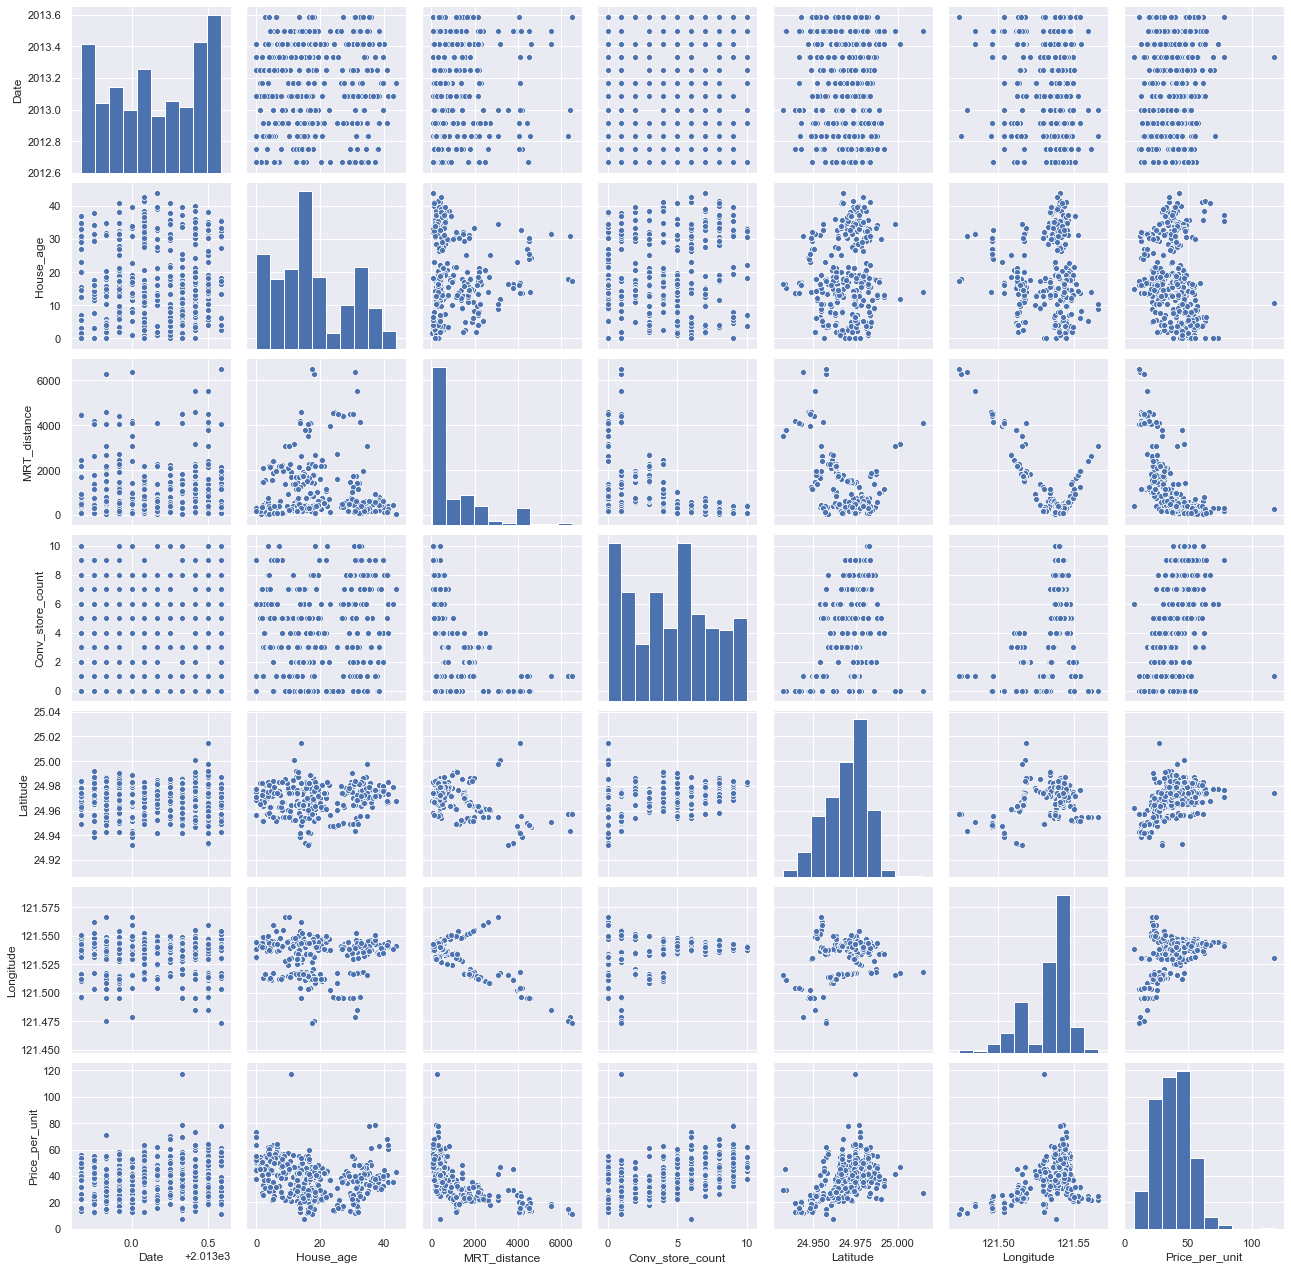

In [9]:
#scatterplot
sns.set()
sns.pairplot(data, size = 2.5)
plt.show();

###### Remarks :
- Here again we can see that price_per_unit have a huge outliers 
- Also with such data in hand we can see that we can estimate the center of the city where the price per unit is the most expensive. In fact if we look at longitude and latitude vs MRT distance and convenient store we can see that all the most expensive house are located in the same area (center of the city ?)

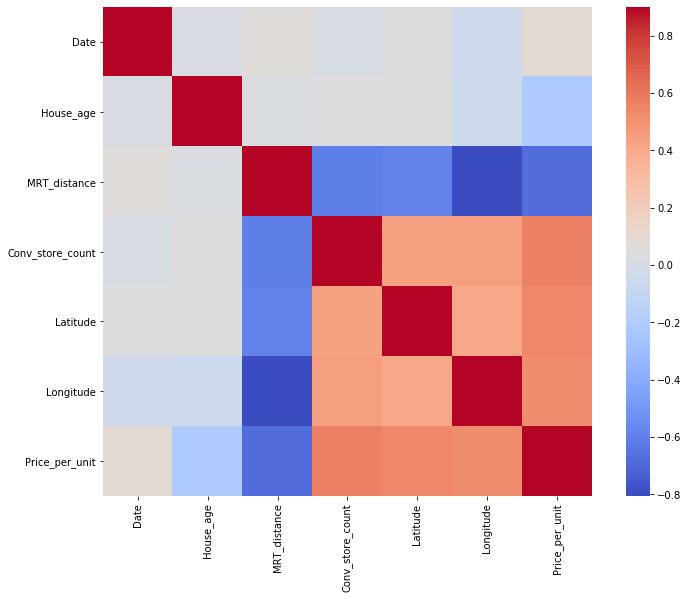

In [47]:
#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.9, square=True,cmap='coolwarm');

###### Remarks :

   - the **Date** are not corrolated, confirm by the plot 
   - **Price_per unit** have a clear outliers at 117.5
   - We should care about the multicollineartiy in the predictor that seems a bit high.

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#gather features
features = "+".join(data.columns[1:-1])

# get y and X dataframes based on this regression:
y, X = dmatrices('Price_per_unit ~' + features, data, return_type='dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)


,VIF Factor,features
0,198732957.2,Intercept
1,1.0,House_age
2,4.3,MRT_distance
3,1.6,Conv_store_count
4,1.6,Latitude
5,2.9,Longitude


In [29]:
features = "+".join((data.drop(['MRT_distance'],axis=1)).columns[1:-1])

# get y and X dataframes based on this regression:
y, X = dmatrices('Price_per_unit ~' + features, data, return_type='dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,79258708.7,Intercept
1,1.0,House_age
2,1.4,Conv_store_count
3,1.3,Latitude
4,1.4,Longitude


In fact if we consider the vif we can see that we might have a problem of multicolinearity with **MRT_distance**

In [8]:

data_no_outlier = data[data['Price_per_unit']<100]
data_no_outlier.describe(include='all')

,Date,House_age,MRT_distance,Conv_store_count,Latitude,Longitude,Price_per_unit
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,2013.148525,17.729298,1085.898530,4.101695,24.969017,121.533368,37.787651
std,0.282163,11.401205,1262.974876,2.945182,0.012422,0.015365,13.046097
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.000000,289.324800,1.000000,24.962990,121.527600,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.400000
75%,2013.417000,28.200000,1455.798000,6.000000,24.977460,121.543310,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,78.300000


In [9]:
data_no_outlier_2 = data_no_outlier[data_no_outlier['Price_per_unit']>8]
data_no_outlier_2.describe(include='all')

,Date,House_age,MRT_distance,Conv_store_count,Latitude,Longitude,Price_per_unit
count,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000
mean,2013.148078,17.736408,1087.579690,4.097087,24.969034,121.533357,37.860922
std,0.282359,11.414149,1264.047654,2.947272,0.012432,0.015382,12.976599
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,11.200000
25%,2012.917000,8.975000,289.324800,1.000000,24.963020,121.527600,27.700000
50%,2013.167000,16.150000,492.231300,4.000000,24.971100,121.538675,38.450000
75%,2013.417000,28.250000,1455.798000,6.000000,24.977582,121.543352,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,78.300000


### Focus on variable 

#### Price per unit

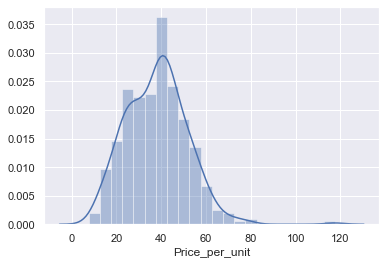

In [9]:
#histogram
sns.distplot(data['Price_per_unit']);

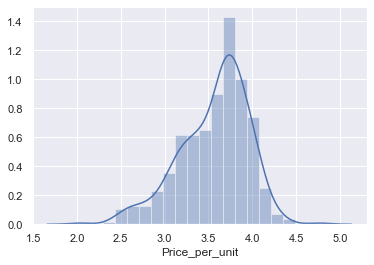

In [10]:
#histogram
sns.distplot(np.log(data['Price_per_unit']));

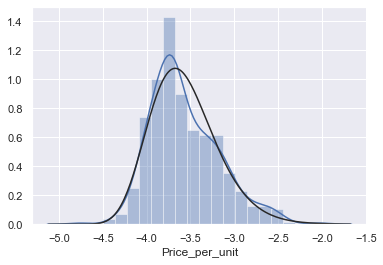

In [11]:
from scipy.stats import lognorm
#histogram
sns.distplot(-np.log(data['Price_per_unit']),fit = lognorm);

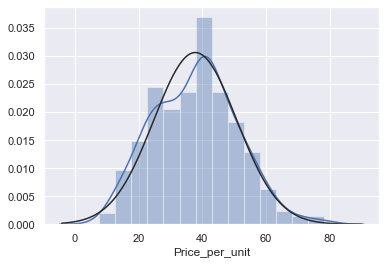

In [12]:
#histogram
sns.distplot(data_no_outlier['Price_per_unit'],fit = norm);

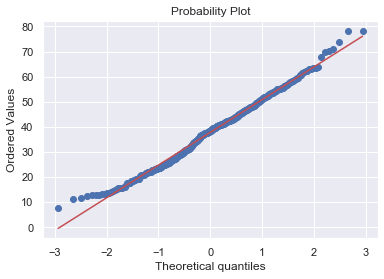

In [13]:
import pylab 
import scipy.stats as stats
stats.probplot(data_no_outlier['Price_per_unit'], dist="norm", plot=pylab)
pylab.show()

#### longitude and latitude

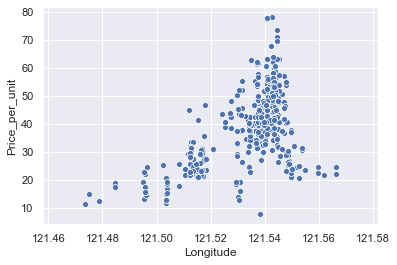

In [25]:
sns.scatterplot(x="Longitude", y="Price_per_unit", data=data_no_outlier);

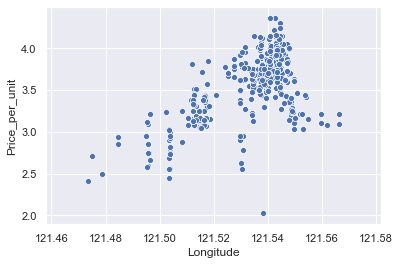

In [31]:
sns.scatterplot(x=data_no_outlier["Longitude"], y=np.log(data_no_outlier["Price_per_unit"]));

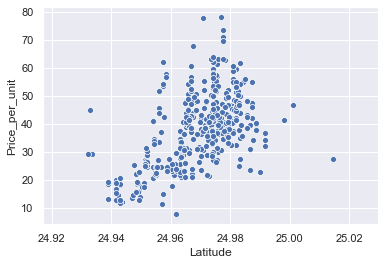

In [26]:
sns.scatterplot(x="Latitude", y="Price_per_unit", data=data_no_outlier);

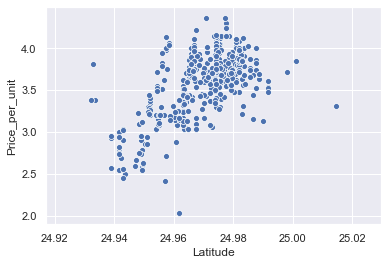

In [32]:
sns.scatterplot(x=data_no_outlier["Latitude"], y=np.log(data_no_outlier["Price_per_unit"]));

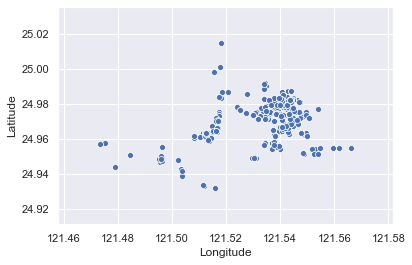

In [28]:
sns.scatterplot(x="Longitude", y="Latitude", data=data_no_outlier);

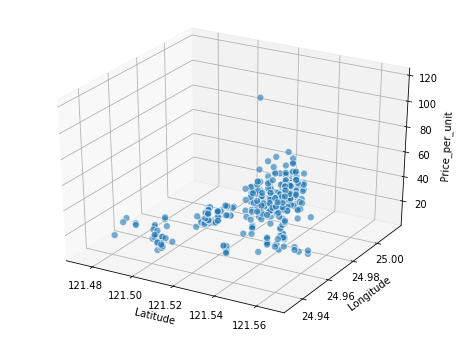

In [34]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = data['Longitude']
ys = data['Latitude']
zs = data['Price_per_unit']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Latitude ')
ax.set_ylabel('Longitude ')
ax.set_zlabel('Price_per_unit')

plt.show()

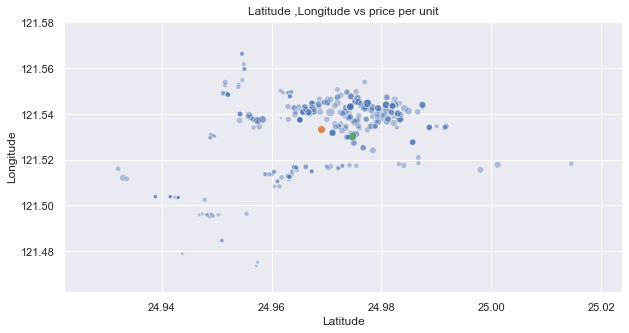

In [65]:
plt.figure(figsize=(10,5))
plt.scatter(x =data['Latitude'], 
            y = data['Longitude'], 
            s = data['Price_per_unit'],
            alpha=0.4, 
            edgecolors='w')
plt.scatter(x = center_latitude , y = center_longitude)
plt.scatter(x = center_latitude_max , y = center_longitude_max)

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Latitude ,Longitude vs price per unit')
plt.show()

switch from cartesienn coordinate to polar coordinate with the ***center of the city*** as center

In [47]:
# the center of the city is definie as the mean of both coordinate
center_longitude = np.mean(data['Longitude'])
center_latitude = np.mean(data['Latitude'])

In [49]:
distance_center_vector = np.c_[data['Longitude'] - center_longitude,data['Latitude'] - center_latitude]

In [55]:
distance_vector = np.linalg.norm(distance_center_vector,axis=1)

In [56]:
np.shape(distance_vector)

(414,)

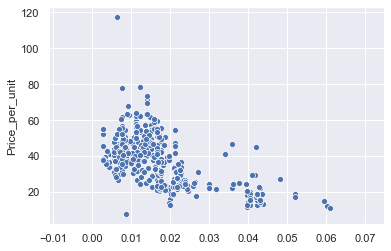

In [58]:
sns.scatterplot(x=distance_vector, y=data["Price_per_unit"]);

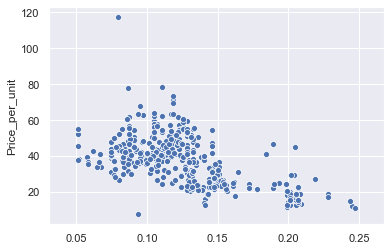

In [69]:
sns.scatterplot(x=np.sqrt(distance_vector), y=data["Price_per_unit"]);

In [62]:
center_longitude_max = data['Longitude'][np.argmax(data['Price_per_unit'])]
center_latitude_max = data['Latitude'][np.argmax(data['Price_per_unit'])]


distance_center_vector_max = np.c_[data['Longitude'] - center_longitude,data['Latitude'] - center_latitude]
distance_vector_max = np.linalg.norm(distance_center_vector_max,axis=1)


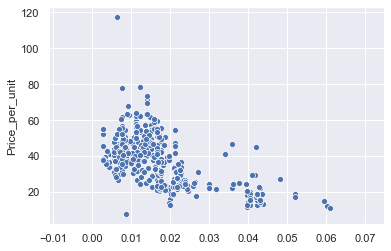

In [64]:
sns.scatterplot(x=distance_vector_max, y=data["Price_per_unit"]);

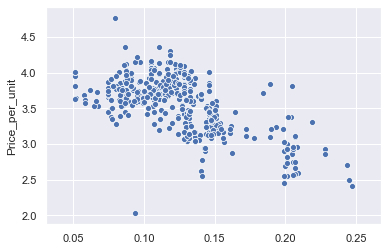

In [68]:
sns.scatterplot(x=np.sqrt(distance_vector_max), y=np.log(data["Price_per_unit"]));

In [74]:
orientation = np.arctan2(distance_center_vector[:,0],distance_center_vector[:,1])

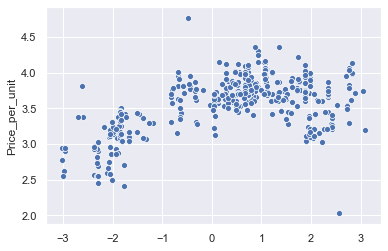

In [76]:
sns.scatterplot(x=orientation, y=np.log(data["Price_per_unit"]));

#### Date

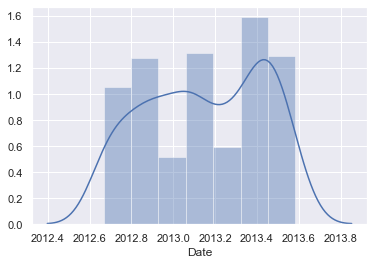

In [29]:
#histogram
sns.distplot(data_no_outlier['Date']);

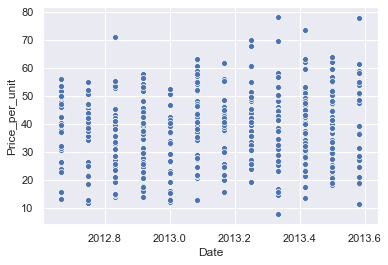

In [30]:
sns.scatterplot(x="Date", y="Price_per_unit", data=data_no_outlier);

#### House age 

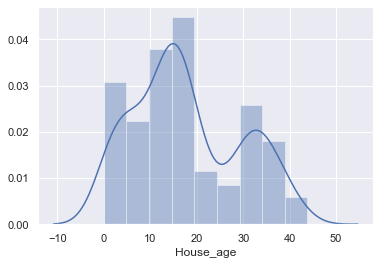

In [33]:
#histogram
sns.distplot(data_no_outlier['House_age']);

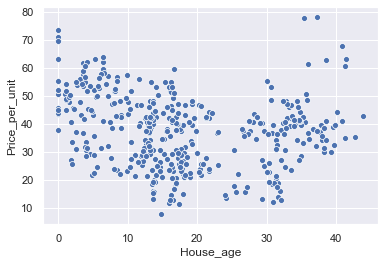

In [10]:
sns.scatterplot(x="House_age", y="Price_per_unit", data=data_no_outlier);

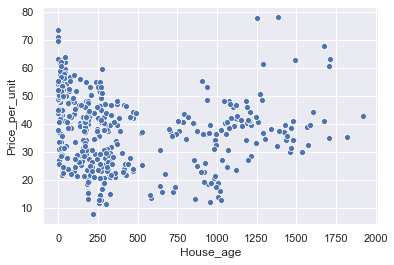

In [12]:
sns.scatterplot(x=np.power(data_no_outlier["House_age"],2), y=data_no_outlier["Price_per_unit"]);

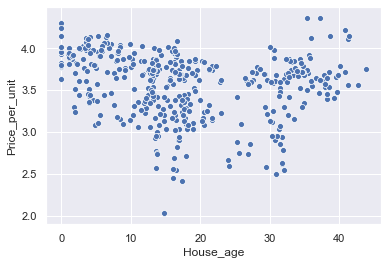

In [11]:
sns.scatterplot(x=data_no_outlier["House_age"], y=np.log(data_no_outlier["Price_per_unit"]));

#### MRT distance
   

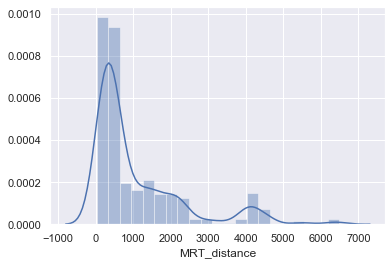

In [35]:
#histogram
sns.distplot(data_no_outlier['MRT_distance']);

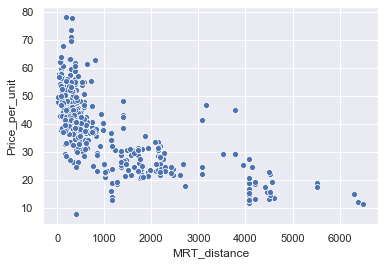

In [36]:
sns.scatterplot(x="MRT_distance", y="Price_per_unit", data=data_no_outlier);

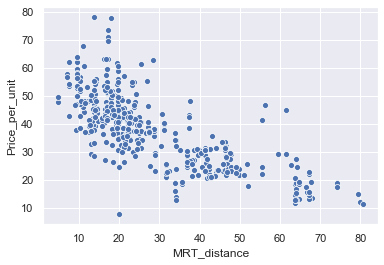

In [15]:
sns.scatterplot(x=np.sqrt(data_no_outlier["MRT_distance"]), y=data_no_outlier["Price_per_unit"]);

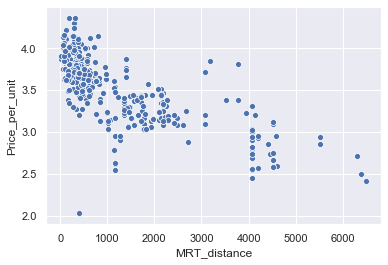

In [37]:
sns.scatterplot(x=data_no_outlier["MRT_distance"], y=np.log(data_no_outlier["Price_per_unit"]));

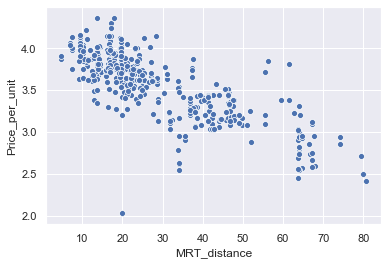

In [45]:
sns.scatterplot(x=np.sqrt(data_no_outlier["MRT_distance"]), y=np.log(data_no_outlier["Price_per_unit"]));

#### Convenient store

  - This take value in Z

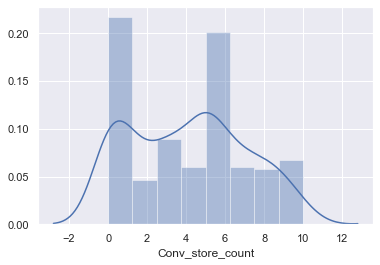

In [38]:
#histogram
sns.distplot(data_no_outlier['Conv_store_count']);

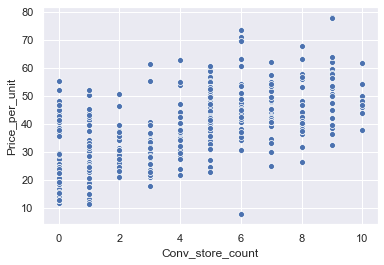

In [40]:
#histogram
sns.scatterplot(x="Conv_store_count", y="Price_per_unit", data=data_no_outlier);

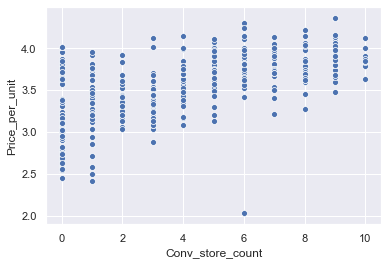

In [41]:
sns.scatterplot(x=data_no_outlier["Conv_store_count"], y=np.log(data_no_outlier["Price_per_unit"]));

### Interaction between variable 

#### First simple estimation :

inference estimation assuming error is gaussian 
OLS estimator

In [47]:
data_no_outlier['MRT_distance_sqrt'] = np.sqrt(data_no_outlier["MRT_distance"])

center_longitude_max = data_no_outlier['Longitude'][np.argmax(data_no_outlier['Price_per_unit'])]
center_latitude_max = data_no_outlier['Latitude'][np.argmax(data_no_outlier['Price_per_unit'])]
distance_center_vector_max = np.c_[data_no_outlier['Longitude'] - center_longitude_max,data_no_outlier['Latitude'] - center_latitude_max]
distance_vector_max = np.linalg.norm(distance_center_vector_max,axis=1)
orientation = np.arctan2(distance_center_vector_max[:,0],distance_center_vector_max[:,1])

data_no_outlier['dist_center'] = np.sqrt(distance_vector_max)
data_no_outlier['orientation'] = orientation

63.37415934791142


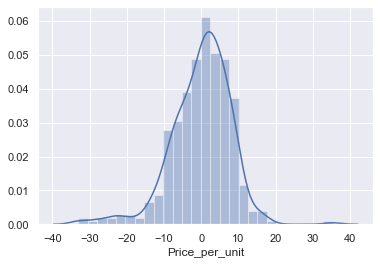

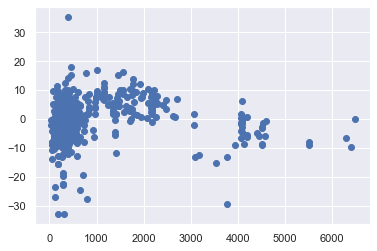

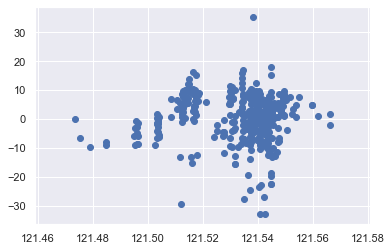

In [44]:
X= data_no_outlier[data_no_outlier.columns[:-1]]
Y = data_no_outlier[data_no_outlier.columns[-1]]

# normlization 
mean =np.mean(X,axis=0)
std = np.std(X,axis=0)
X = (X-mean)/std
X_one = np.c_[np.ones(413),X]

beta_hat = np.linalg.solve(X_one.T@X_one,X_one.T@Y)

Y_pred = X_one@beta_hat

loss = np.mean((Y_pred-Y)**2)

sns.distplot(Y_pred-Y);

print(np.var(Y-Y_pred))

plt.figure()
plt.scatter(data_no_outlier["MRT_distance"],Y_pred-Y)

plt.figure()
plt.scatter(data_no_outlier["Longitude"],Y_pred-Y)


Price_per_unit    50.860031
dtype: float64


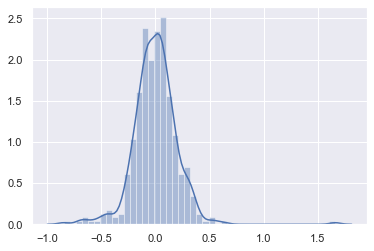

In [55]:
predictors = [ 'MRT_distance_sqrt' ,'dist_center','House_age' ,'Date' ,'Conv_store_count' ]
X = data_no_outlier[predictors].dropna()
Y = np.log(data_no_outlier[['Price_per_unit']])

# normlization 
mean =np.mean(X,axis=0)
std = np.std(X,axis=0)
X = (X-mean)/std
X_one = np.c_[np.ones(413),X]

beta_hat = np.linalg.solve(X_one.T@X_one,X_one.T@Y)

Y_pred = X_one@beta_hat

loss = np.mean((np.exp(Y_pred)-np.exp(Y))**2)

sns.distplot(Y_pred-Y);

print(loss)


In [57]:
print(beta_hat)

[[ 3.56378992]
 [-0.13288854]
 [-0.16681167]
 [-0.08304641]
 [ 0.0402003 ]
 [ 0.04167269]]


In [40]:
beta_hat

array([37.78765133,  1.29747743, -2.97449813, -4.92637037,  3.78478749,
        2.76834637,  0.24434982])

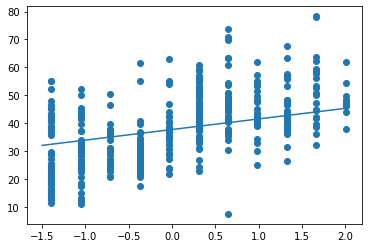

In [43]:
plt.figure()
plt.scatter(X_one[:,4],Y)
x = np.linspace(-1.5,2,100)
plt.plot(x,beta_hat[0]+beta_hat[4]*x)

[nan nan nan nan nan nan nan nan nan nan]
nan


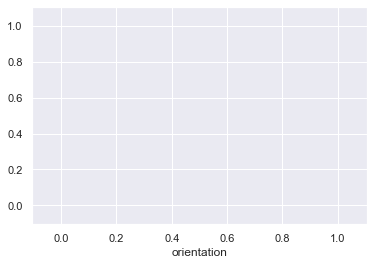

In [40]:
X = data_no_outlier[data_no_outlier.columns[:-1]]
Y = np.log(data_no_outlier[data_no_outlier.columns[-1]])

# normlization 
mean =np.mean(X,axis=0)
std = np.std(X,axis=0)
X = (X-mean)/std
X_one = np.c_[np.ones(413),X]

beta_hat = np.linalg.solve(X_one.T@X_one,X_one.T@Y)
print(beta_hat)
Y_pred = X_one@beta_hat

sns.distplot(np.exp(Y)-np.exp(Y_pred));
print(np.var(np.exp(Y)-np.exp(Y_pred)))

49.37663763957753


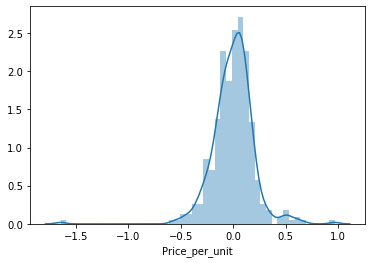

In [45]:
X = data_no_outlier[data_no_outlier.columns[:-1]]
X = np.c_[np.sqrt(data_no_outlier["MRT_distance"]),X]
Y = np.log(data_no_outlier[data_no_outlier.columns[-1]])

# normlization 
mean =np.mean(X,axis=0)
std = np.std(X,axis=0)
X = (X-mean)/std
X_one = np.c_[np.ones(413),X]

beta_hat = np.linalg.solve(X_one.T@X_one,X_one.T@Y)

Y_pred = X_one@beta_hat

sns.distplot(Y-Y_pred);
print(np.var(np.exp(Y)-np.exp(Y_pred))) 